In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
import sys
import json

#set the path to the raw tweets file
tweets_data_path = '/Users/AudreyChen/Desktop/StatSoftware/test2.txt'

#initialize an array and open the raw tweets file for reading
tweets_data = []
tweets_file = open(tweets_data_path, "r")

#process each line in raw tweets file
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
#print how many tweets were processed
print (len(tweets_data))

214969


In [4]:
tweets = pd.DataFrame()

In [5]:
tweets['text'] =  [tweet.get('text','') for tweet in tweets_data]

# Top hashtags

In [6]:
import json

hashtag_list = {}
fh = open(tweets_data_path,'r')
# loop over lines in file
for line in fh:
    # load json data
    try:
        tweet = json.loads(line)
    except:
        continue       
    if 'text' not in tweet:
        continue
    # extract hashtags entities    
    hts = tweet['entities']['hashtags']
    for hinfo in hts:
        h = hinfo['text']
        # add hashtag to list
        hashtag_list[h] = 1 + hashtag_list.get(h,0)

In [20]:
listofTuples = sorted(hashtag_list.items() , reverse=True, key=lambda x: x[1])

In [8]:
pd.DataFrame(listofTuples)[:10]

,0,1
0,YERI,11048
1,STATION,11047
2,Trolls,11034
3,VoiceSaveReagan,5890
4,voicesavereagan,2201
5,VoiceSaveDeAndre,1988
6,VoiceSaveDave,1442
7,voicesaveDeandre,853
8,RAW,636
9,RedVelvet,580


# Top Users

In [21]:
user_list = {}
fh = open(tweets_data_path,'r')
for line in fh:
    try:
        tweet = json.loads(line)
    except:
        continue       
    if 'text' not in tweet:
        continue
    u = tweet['user']['name']
    user_list[u] = tweet['user']['followers_count']

In [22]:
users = sorted(user_list.items() , reverse=True, key=lambda x: x[1])
pd.DataFrame(users).head(10)

,0,1
0,The New York Times,42423591
1,UberFacts,14018441
2,Vogue Magazine,13558470
3,Starbucks Coffee,11457829
4,WWE,10296370
5,SMTOWN,7002073
6,Google Play,6954577
7,La Patilla,6834605
8,Entertainment Weekly,6578651
9,What The F*** Facts,6161490


# Top retweets

In [23]:
retweets = {}
fh = open(tweets_data_path, 'r')
for line in fh:
    try:
        retweet = json.loads(line)
    except:
        continue
    if 'retweeted_status' not in retweet:
        continue
    rt = retweet['retweeted_status']
    if rt['retweet_count'] < 1000:
        continue
    retweets[rt['id_str']] = rt
    # convert to list
retweets = [retweets[w] for w in retweets.keys()]
    # sort by retweet count
retweets.sort(key=lambda x: -x['retweet_count'])

In [29]:
for t in retweets[:10]:
    print ('['+ t['user']['screen_name'] + ']: ' + t['text'] + \
    ' [' + str(t['retweet_count']) + ' retweets]'+'\n')

[ArianaGrande]: thank god https://t.co/vYdSThTcAU [325248 retweets]

[AGT]: SCREAMING!!! 🙌 🤩 @bts_bighit is blessing the #AGT stage NEXT WEDNESDAY. RETWEET if you are FREAKING OUT about… https://t.co/CryFu6XbC5 [277051 retweets]

[ArianaGrande]: thank u fuckin next [272267 retweets]

[BTS_twt]: Thank u BANGKOK https://t.co/zTrwKIaJxF [213774 retweets]

[lwtcaprio]: since it’s spooky season, let me bring back my favourite video on the internet https://t.co/U2XjHVAlmw [200273 retweets]

[ArianaGrande]: thank u, next [182565 retweets]

[bebekittenheels]: This is the only thing I will be able to think about for the next week https://t.co/u7mtMpmf51 [175357 retweets]

[KrisJenner]: thank u, next, bitch ;) https://t.co/sAvONID1hn [158492 retweets]

[Harry_Styles]: I am overwhelmed, thank you. If I don't get to see you this tour, I'll come back around next year if you'll have me. Love, H. [157954 retweets]

[ayeejuanitodoe]: RT and you’ll pass your next exam with an A 🤪 https://t.co/d0MStRd0b

# Top sig. words

In [24]:
from nltk.tokenize import TweetTokenizer
from nltk.stem.porter import PorterStemmer

def tweet_tokenizer(verbatim):
    try:
        tokenizer = TweetTokenizer()
        all_tokens = tokenizer.tokenize(verbatim.lower())
        # this line filters out all tokens that are entirely non-alphabetic characters
        filtered_tokens = [t for t in all_tokens if t.islower()]
        # filter out all tokens that are <=2 chars
        filtered_tokens = [x for x in filtered_tokens if len(x)>2]
    except IndexError:
        filtered_tokens = []
    return(filtered_tokens)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

def get_frequent_terms(text_series, stop_words = None, ngram_range = (1,2)):
    count_vectorizer = CountVectorizer(analyzer = "word",
                                       tokenizer = tweet_tokenizer,
                                       stop_words = stop_words, 
                                       ngram_range = ngram_range 
                                      )
    term_freq_matrix = count_vectorizer.fit_transform(text_series)
    terms = count_vectorizer.get_feature_names()
    term_frequencies = term_freq_matrix.sum(axis = 0).tolist()[0]

    term_freq_df = (pd.DataFrame(list(zip(terms, term_frequencies)), columns = ["token","count"])
                    .set_index("token")
                    .sort_values("count",ascending = False))
    return term_freq_df

In [26]:
term_freq_df = get_frequent_terms(tweets['text'],stop_words = "english") 

In [29]:
term_freq_df.head(10)

,count
token,
thank,35555
year,16745
ariana,14703
stay,13621
week,12746
red,11194
wishing,11162
nct,11098
#yeri,11059


# Top Urls

In [30]:
url_list = {}
fh = open(tweets_data_path,'r')

for line in fh:
    try:
        tweet = json.loads(line)
    except:
        continue       
    if 'text' not in tweet:
        continue
    urls = tweet['entities']['urls']
    for url in urls:
        h = url['expanded_url']
        url_list[h] = 1 + url_list.get(h,0)

In [27]:
topUrls = sorted(url_list.items() , reverse=True, key=lambda x: x[1])

NameError: name 'url_list' is not defined

In [32]:
topUrls[:10]

[('https://twitter.com/spankyounext/status/1069750302016856064', 1700),
 ('https://twitter.com/ssvinjed/status/1069192288742645760', 1687),
 ('https://twitter.com/Arizonaxgreys/status/1069408537745518595', 691),
 ('https://twitter.com/shonfaye/status/1069933893917270016', 671),
 ('https://twitter.com/jogwsvorazes/status/1069075618078359552', 650),
 ('https://twitter.com/realsophiarobot/status/1068339086442864640', 594),
 ('https://twitter.com/into/status/1069658928403820544', 527),
 ('https://twitter.com/independent/status/1069630069834944512', 402),
 ('https://www.soompi.com/article/1272883wpp/red-velvets-yeri-teams-ncts-renjun-jeno-jaemin-next-sm-station-track',
  357),
 ('https://twitter.com/spankyounext/status/1069385363112681472', 347)]

# WordCloud

In [6]:
tweets = pd.DataFrame()
tweets['text'] =  [tweet.get('text','') for tweet in tweets_data]

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt    

In [16]:
tweets['tidy_tweet'] = tweets['text'].str.replace("[^a-zA-Z#]", " ")
tweets['tidy_tweet'] = tweets['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
tokenized_tweet = tweets['tidy_tweet'].apply(lambda x: x.split())
#tokenized_tweet.head()

from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
#tokenized_tweet.head()

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
tweets['tidy_tweet'] = tokenized_tweet

In [17]:
all_words = ' '.join([text for text in tweets['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

,text,tidy_tweet
0,"RT @arssouza_: Thank u, next mas se vc quiser ...",arssouza Thank next quiser come back tamo
1,RT @ccrstrna: Somebody said this is Ariana and...,ccrstrna Somebody said this Ariana victoria ju...
2,Race Is On to Protect Data From Next Leap in C...,Race Protect Data From Next Leap Computers Chi...
3,BLOOD BRUDDA NEXT💉🌍🎱🧱...\n\n“I ain’t tryn rhym...,BLOOD BRUDDA NEXT tryn rhyme tryn tell story h...
4,RT @Morarolando4: quiero ser lexie https://t.c...,Morarolando quiero lexie https LjPdPGvvvV


0    [arssouza, Thank, next, quiser, come, back, tamo]
1    [ccrstrna, Somebody, said, this, Ariana, victo...
2    [Race, Protect, Data, From, Next, Leap, Comput...
3    [BLOOD, BRUDDA, NEXT, tryn, rhyme, tryn, tell,...
4      [Morarolando, quiero, lexie, https, LjPdPGvvvV]
Name: tidy_tweet, dtype: object

0    [arssouza, thank, next, quiser, come, back, tamo]
1    [ccrstrna, somebodi, said, thi, ariana, victor...
2    [race, protect, data, from, next, leap, comput...
3    [blood, brudda, next, tryn, rhyme, tryn, tell,...
4        [morarolando, quiero, lexi, http, ljpdpgvvvv]
Name: tidy_tweet, dtype: object

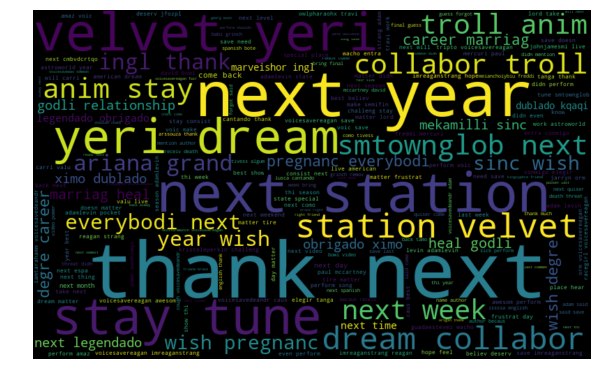